# Clase Atrasada

# Repaso

Para esta clase no fui :c, estaba en La Serena e igual valio la pena jasjasj.

Se ha estado mezclado el area de la econometria y el machine learning.

## Econometria

Clasicamente, NO separa los datos en test y train, el modelo se mide segun diversas metricas: R2, test t, test F, verosimilitud, etc. Hay pruebas de hipotesis

## Machine Learning

Separa los datos en test y train! No hay pruebas de hipotesis. Hay diversas metricas para saber si un modelo de Machine Learning es bueno o no (R2, Mean Squared Error, Mean Absolute Error, etc)

- Aqui hay dos fases: Entrenarlo y testearlo

Los modelos pueden servir para predecir cosas!

Es mejor tener un modelo parsimonioso! O sea, que sea un modelo que se explique con poquitas variables y buenas.

# Predicciones

Recordemos que todos los modelos que estabamos haciendo eran para predecir un numero (cantidad de salario, cantidad de precio de una casa, etc). Sin embargo, como predigo si algo va a ser rojo, azul, etc. Como predigo una clasificacion? Para eso es esta clases

# Clasificacion

- Estas predicciones responden a las preguntas: "Este video es apto para ser visto por ninos? Si/No"; "Este cliente va a pagar o no va a pagar? Si/No", etc. No responde a predecir numeros

- A veces se quiere minimizar equivocarse en una respuesta mas que otra (Ej: "Este video es apto para un nino?" Prefiero inflar la clasificacion de videos NO aptos para ninos, a pesar de que estos realmente si sean aptos para ninos. Esto, porque se evita clasificar un video verdaderamente NO apto para un nino como algo que si es apto para ninnos)

- Se pueden hacer modelos para mas de 2 clasificaciones (Si/No)


# Clasificacion desde la Econometria

- El vector objetivo representa un atributo discreto (Azul, Rojo - 1, 0 - etc)

- Es de aprendizaje supervisado, o sea, que se quiere predecir una variable objetivo a traves de variables independientes

- Aprendizaje no supervisado: No intenta predecir una variable dependiente, si no que quiere agrupar los datos que se tienen (Por ej: PCA/Clustering/etc)

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('wells.csv').drop(columns='index')

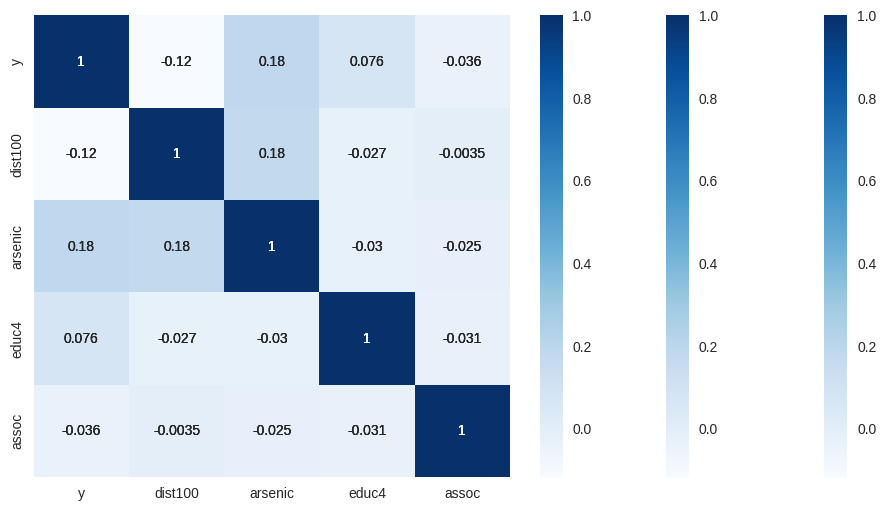

In [20]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()
# Como se puede ver, las variables no tienen muchas relacion. 
# Sin embargo, no hay problema, ya que R2 de pearson solo funciona si las variables tienen
# distribuciones normales. Por lo tanto, puede que nuestras variables no tengan una distr. normal.

In [9]:
# En este caso se esta viendo si una persona se cambio de pozo de agua
# con arsenico o no.
df

,y,dist100,arsenic,educ4,assoc
0,1,0.16826,2.36,0.00,0
1,1,0.47322,0.71,0.00,0
2,0,0.20967,2.07,2.50,0
3,1,0.21486,1.15,3.00,0
4,1,0.40874,1.10,3.50,1
...,...,...,...,...,...
3015,0,0.19347,0.52,1.25,1
3016,0,0.21386,1.08,0.75,1
3017,0,0.07708,0.51,1.00,0
3018,0,0.22842,0.64,0.75,0


## Modelo de Probabilidad Lineal

Una de las primeras formas de responder al problema de clasificacion es con el modelo de probabilidad lineal. Este modelo predice la probabilidad de que ocurra un suceso (en este caso, la probabilidad de que una persona se cambie de pozo), dependiendo de diversas variables.

y = n + mx + e

Por lo tanto, las variables estarian afectando la probabilidad de que algo ocurra o no. Al ser un modelo lineal, es igual a lo que ya habiamos hecho

Aqui estamos prediciendo la probabilidad de que una familia se cambie de pozo (y) con respecto a la distancia que tiene de un pozo (dist100).

In [12]:
ml_ols = smf.ols('y ~ dist100', data=df).fit()

In [14]:
ml_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     42.57
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           7.95e-11
Time:                        00:15:02   Log-Likelihood:                -2136.2
No. Observations:                3020   AIC:                             4276.
Df Residuals:                    3018   BIC:                             4288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6484      0.014     45.194      0.000       0.620       0.677
dist100       -0.1515      0.023     -6.525      0.000      -0.197      -0.106
==============================================================================
Omnibus:                    11769.028   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              478.263
Skew:                          -0.305   Prob(JB):                    1.40e-104
Kurtosis:                       1.148   Cond. No.                         3.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# De las metricas anteriores podemos decir que cuando una persona
# tiene 0 metros de distancia de un pozo mejor, entonces tiene un 65% de probabilidades
# de cambiarse de pozo. Por otro lado, cuando se aleja 100 metros de un pozo seguro, entonces la
# probabilidad de cambiarse de pozo baja en 15% aprox

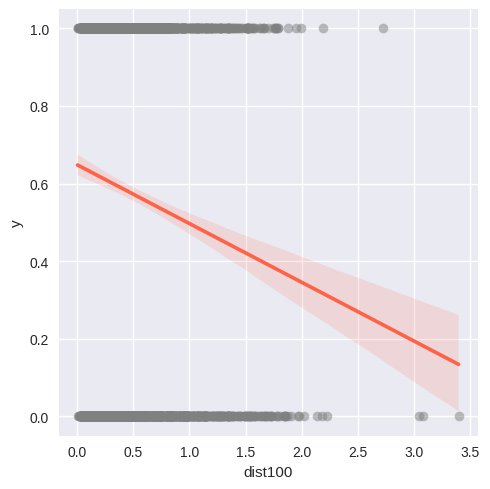

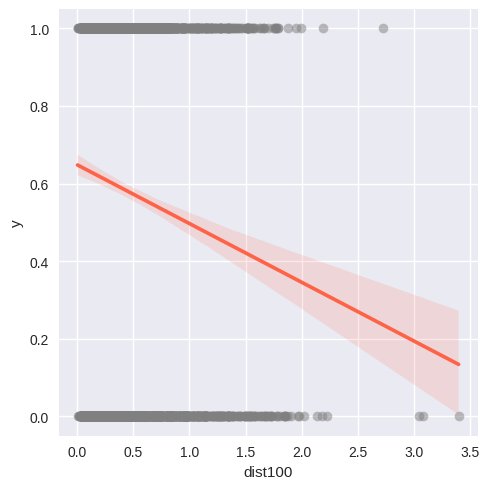

In [17]:
sns.lmplot('dist100', 'y', df,
           line_kws={'color': 'tomato'},
           scatter_kws= {'color': 'grey',
                         'alpha': .5})
plt.show()

# Limitantes del Modelo de Probabilidad Lineal

- Las predicciones pueden dar menores a 0 y mayores a 1, lo que no tiene sentido en la estadistica pues
- Los errores NO son normales

# Regresion Logistica

- Es un modelo que dice:

1. log(Pr(y) / 1 - Pr(y)) = Modelo de Regresion Lineal

Que es lo mismo que decir

2. log(Probabilidad Suceso / Probabilidad Fallo) = Modelo Lineal

Por ejemplo, se espera que Chile gane 1 partido y Brasil 5. Por lo tanto:

log(1/6 / 5/6) = log(1/5)!s

Para implementarlo, se hace de forma similar a como se hacia con el ols, pero ahora con logit.

## Distribucion funcion Logistica

![Funcion Logistica](https://www.iartificial.net/wp-content/uploads/2019/04/Funcion-Logistica.jpg)

Al ver la distribucion de datos en el modelo anterior, se puede ver que una distribucion logistica
podria explicar de mejor manera los datos. Esto, ya que presenta una distribucion sigmoidea,
ideal para datos categoricos

In [28]:
m1_logit = smf.logit('y ~ dist100', df).fit()

Optimization terminated successfully.
         Current function value: 0.674874
         Iterations 4


In [29]:
m1_logit.summary()

# Aqui el estadistico de prueba es z, que distribuye normal. La interpretacion es
# igual que en t. Aqui no hay test F.

# Modelo Nulo = Modelo con solo intercepto
# Modelo Saturado = Modelo con todas las variables disponibles

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3020
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.01017
Time:                        01:21:24   Log-Likelihood:                -2038.1
converged:                       True   LL-Null:                       -2059.0
Covariance Type:            nonrobust   LLR p-value:                 9.798e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6060      0.060     10.047      0.000       0.488       0.724
dist100       -0.6219      0.097     -6.383      0.000      -0.813      -0.431
==============================================================================
"""

# Bondad de ajuste del modelo logistico

Hay 2 metricas importantes:

- Log-likelihood: Igual que en el modelo de regresion lineal
- LL-Null: La verosimilitud del modelo SIN regresores (el modelo nulo, solo el interceptos)

Se quiere ver siempre el log-likelihood mayor.

In [23]:
# Como podemos ver, dist100 tiene un coeficiente de -0.62. Pero esto
# tiene una interpretacion distinta al del modelo lineal, ya que recordemos que estamos haciendo
# modelo para log(Prob.Succes/Prob.Fail), por lo tanto, tiene un significado distinto.

# Algo importante es que log(Prob.Success/Prob.Fail) es llamado log odds

# De log-odds a probabilidad

- Recordemos que el modelo que creamos predice log odds, pero esto es poco intuitivo para saber cuanto afecta mi variable a la probabilidad de ocurrencia del evento. Para poder interpretar bien, es necesario cambiar de log odds a probabilidad. 

- Para cambiar log odds a probabilidad se utiliza la funcion logistica inversa. O sea,:

logit -1 (x) = exp(x) / 1 + exp(-x)

In [25]:
# Para calcular la probabilidad, primero debemos estimar la probabilidad promedio
# Esto se hace, utilizando el modelo lineal con la media de la variable independiente

dist_mean = df['dist100'].mean()

estimate_y = m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * dist_mean)

In [31]:
estimate_y

0.30539223925157555

In [32]:
def invlogit(x):
    '''Funcion para invertir un logit. Se ingresa el resultado de un logit'''
    return 1 / (1 + np.exp(-x))

print(invlogit(estimate_y))

0.5757601624040816


# Efecto Diferencial

Ahora que ya sabemos como sacar la probabilidad de la distancia promedio, podemos hacer lo mismo pero con todos los puntos de la distancia!

Por ejemplo, cual es la probabilidad de cambiarse de pozo al estar a 1, 2, 3, 4 metros de un pozo seguro?

Al hacer los distintos casos, se puede ver que el cambio de probabilidad entre 100 a 200 metros es de 0.15. Por otro lado, entre 200 a 300 metros es de 0.125. Por ultimo, entre 300 a 400 metros es de 0.089!. Esto significa que el cambio de probabilidad de un pozo a otro es diferencial, y NO es constante como la regresion lineal!

In [34]:
y_1 = m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * 1)
invlogit(y_1)

0.4960194411878717

In [35]:
y_2 = m1_logit.params['Intercept'] + (m1_logit.params['dist100'] * 2)
invlogit(y_2)

0.34574300299201427

# Punto Equidistante

Es el punto donde la probabilidad de ocurrencia del evento es igual a la probabilidad de NO ocurrencia del evento (0.5). Este se puede asociar a la variable independiente, y decir en que valor hay que situarse para estar en el medio finalmente jaja. En el caso anterior, cual es la distancia para tener una misma probabilidad de cambiarse de pozo de que no.

Para calcularlo se utiliza: 

Valor_x = Intercepto / Pendiente 